## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it?

## 练习2
在课程中，已经学习了如何用Fashion MNIST数据集训练分类器。Fashion MNIST是一个包含服装项目的数据集。还有另一个类似的数据集叫MNIST，它包含很多手写数字（0到9）的图片和标签。

编写一个MNIST分类器，让它可以训练到99%以上的准确率，并且在达到这个准确率时，就通过回调函数停止训练。

一些注意事项。
1. 它应该在小于10个epochs的情况下成功，所以把epochs改成10个也可以，但不能大过10个。
2. 当它达到99%以上时，应该打印出 "达到99%准确率，所以取消训练！"的字符串。
3. 如果你添加了任何额外的变量，请确保你使用与类中使用的变量相同的名称。

我已经为你准备了下面的代码--请完成这个程序。

In [15]:
import tensorflow as tf
# YOUR CODE SHOULD START HERE
# when accuracy is 99% will call stop training function
# callback function
from tensorflow.keras.callbacks import Callback
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
# YOUR CODE SHOULD END HERE
      
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE
x_train = x_train / 255.0
x_test = x_test / 255.0
# YOUR CODE SHOULD END HERE

model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


on_epoch_end = myCallback()


# YOUR CODE SHOULD START HERE
# config callback for the model
model.fit(x_train, y_train, epochs=10, callbacks=[on_epoch_end])
# YOUR CODE SHOULD END HERE
test_loss, test_acc = model.evaluate(x_test, y_test)

/Users/raven/Documents/devlop/all_in_ai/ml_learn/venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8897 - loss: 0.3854
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9702 - loss: 0.0978
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0612
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0410
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0305
Epoch 6/10
1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0252
Reached 99% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0252
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.9776 - loss: 0.0759


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
[1.0684544e-09 3.0276209e-11 8.3627476e-08 1.2354209e-04 1.9858366e-13
 4.5122587e-08 1.0054330e-13 9.9987257e-01 5.3466483e-08 3.7286666e-06]
7


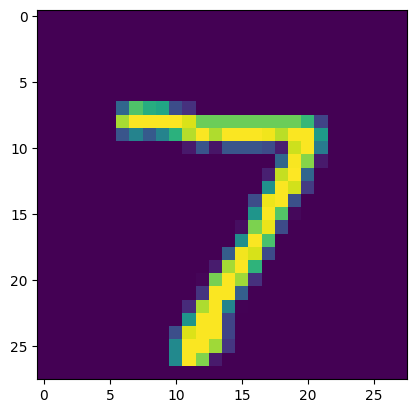

In [14]:
predictResult = model.predict(x_test)

import matplotlib.pyplot as plt
print(predictResult[0])
print(y_test[0])
plt.imshow(x_test[0])